# Proyek Analisis Data: [Input Nama Dataset]

---


- **Nama:** Daffa Setyo Irshandy
- **Email:** daffasetyo16@gmail.com
- **ID Dicoding:** daffa_setyo_irshandy

## Menentukan Pertanyaan Bisnis

- Kota mana yang melakukan transaksi pembelian terbanyak dan sedikit ?

- Berapa lama durasi pengiriman kepada customer setelah melakukan transaksi?

- Pada kategori produk apa yang memiliki penjualan tertinggi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [16]:
customers_df = pd.read_csv('customers_dataset.csv')
customers_df.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [17]:
sellers_df = pd.read_csv('sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [19]:
products_df = pd.read_csv('products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [20]:
orders_df = pd.read_csv('orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Assessing Data

In [25]:
customers_df.info()
customers_df.describe()
customers_df.isna().sum()
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
print("Data kosong: ", customers_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah duplikasi:  0
Data kosong:  customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [26]:
sellers_df.info()
sellers_df.describe()
sellers_df.isna().sum()
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
print("Data kosong: ", sellers_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
Jumlah duplikasi:  0
Data kosong:  seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


In [27]:
products_df.info()
products_df.describe()
products_df.isna().sum()
print("Jumlah duplikasi: ", products_df.duplicated().sum())
print("Data kosong: ", products_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah duplikasi:  0
Data kosong:  product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_

In [28]:
orders_df.info()
orders_df.describe()
orders_df.isna().sum()
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
print("Data kosong: ", orders_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Jumlah duplikasi:  0
Data kosong:  order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783

### Cleaning Data

In [30]:
#membersihkan data product

products_df.fillna(value="no value", inplace=True)
products_df.isnull().sum()
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   product_id                  32951 non-null  object
 1   product_category_name       32951 non-null  object
 2   product_name_lenght         32951 non-null  object
 3   product_description_lenght  32951 non-null  object
 4   product_photos_qty          32951 non-null  object
 5   product_weight_g            32951 non-null  object
 6   product_length_cm           32951 non-null  object
 7   product_height_cm           32951 non-null  object
 8   product_width_cm            32951 non-null  object
dtypes: object(9)
memory usage: 2.3+ MB


<ipython-input-30-8ddfa9e70415>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'no value' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  products_df.fillna(value="no value", inplace=True)


In [40]:
# membersihkan data orders
# data waktu masih dalam bentuk object

waktu = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for column in waktu:
    orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.fillna(value="2018-05-08 23:38:46", inplace=True)
orders_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


## Exploratory Data Analysis (EDA)

### Explore data pembeli terbanyak dan sedikit berdasarkan kota

In [41]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [45]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


## Visualization & Explanatory Analysis

### Pertanyaan 1:

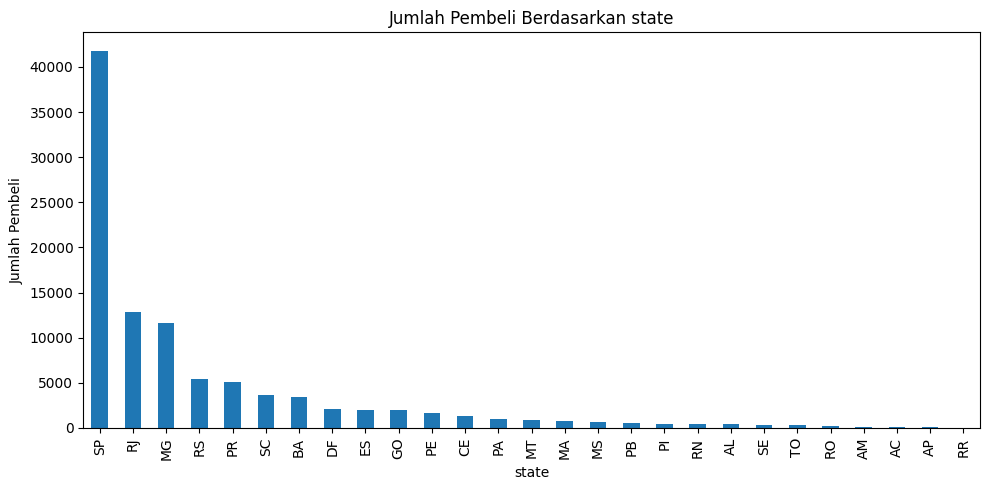

In [67]:
customer_city = customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

# Membuat visualisasi bar chart
plt.figure(figsize=(10, 5))
customer_city.plot(kind='bar')
plt.title('Jumlah Pembeli Berdasarkan state')
plt.xlabel('state')
plt.ylabel('Jumlah Pembeli')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Pertanyaan 2:

In [68]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['delivery_time'] = orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']


In [69]:
orders_df['delivery_time_days'] = orders_df['delivery_time'].dt.days
print(orders_df[['order_purchase_timestamp', 'order_delivered_customer_date', 'delivery_time_days']])

      order_purchase_timestamp order_delivered_customer_date  \
0          2017-10-02 10:56:33           2017-10-10 21:25:13   
1          2018-07-24 20:41:37           2018-08-07 15:27:45   
2          2018-08-08 08:38:49           2018-08-17 18:06:29   
3          2017-11-18 19:28:06           2017-12-02 00:28:42   
4          2018-02-13 21:18:39           2018-02-16 18:17:02   
...                        ...                           ...   
99436      2017-03-09 09:54:05           2017-03-17 15:08:01   
99437      2018-02-06 12:58:58           2018-02-28 17:37:56   
99438      2017-08-27 14:46:43           2017-09-21 11:24:17   
99439      2018-01-08 21:28:27           2018-01-25 23:32:54   
99440      2018-03-08 20:57:30           2018-03-16 13:08:30   

       delivery_time_days  
0                       8  
1                      13  
2                       9  
3                      13  
4                       2  
...                   ...  
99436                   8  
99437  

In [70]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_time_days
count,98977,98977,98977,98977,98977,98977,98977,98977,98977,98977.000000
unique,98977,98977,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96472,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-30 10:43:43.534073600,2017-12-31 03:30:14.980884224,2018-01-06 10:44:23.283348736,2018-01-17 09:34:48.901856,2018-01-23 05:48:10.962546944,17 days 22:51:05.367782414,17.490073
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,0 days 01:26:01,0.000000
25%,NaN,NaN,NaN,2017-09-11 21:44:38,2017-09-12 15:05:27,2017-09-19 16:38:58,2017-09-29 20:33:37,2017-10-03 00:00:00,6 days 20:26:47,6.000000
50%,NaN,NaN,NaN,2018-01-17 23:59:58,2018-01-18 17:13:02,2018-01-26 17:59:15,2018-02-08 20:26:52,2018-02-14 00:00:00,10 days 10:09:28,10.000000
75%,NaN,NaN,NaN,2018-05-03 13:33:33,2018-05-04 02:51:41,2018-05-08 23:38:46,2018-05-14 17:26:48,2018-05-25 00:00:00,16 days 05:33:42,16.000000
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,611 days 02:23:27,611.000000


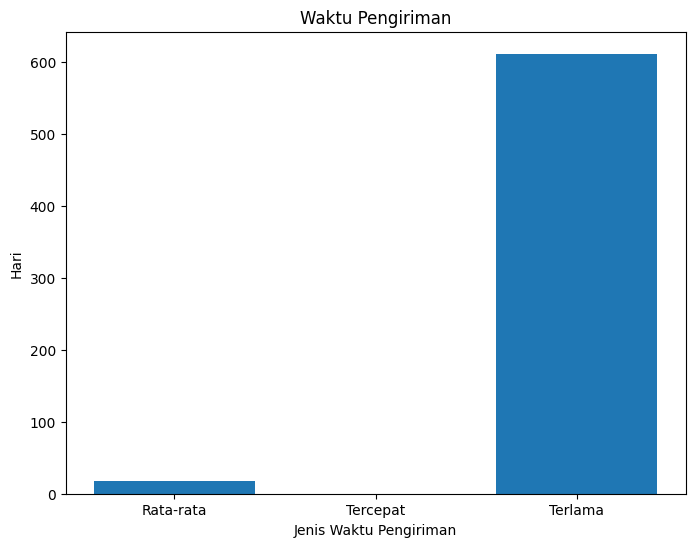

Rata-rata waktu pengiriman:  17.490073451407902  hari
Waktu pengiriman tercepat:  0  hari
Waktu pengiriman terlama:  611  hari


In [71]:
average_delivery_time = orders_df['delivery_time_days'].mean()

# Menemukan waktu pengiriman tercepat
fastest_delivery_time = orders_df['delivery_time_days'].min()

# Menemukan waktu pengiriman terlama
slowest_delivery_time = orders_df['delivery_time_days'].max()

# Membuat visualisasi bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Rata-rata', 'Tercepat', 'Terlama'], [average_delivery_time, fastest_delivery_time, slowest_delivery_time])
plt.title('Waktu Pengiriman')
plt.xlabel('Jenis Waktu Pengiriman')
plt.ylabel('Hari')
plt.show()

print("Rata-rata waktu pengiriman: ", average_delivery_time, " hari")
print("Waktu pengiriman tercepat: ", fastest_delivery_time, " hari")
print("Waktu pengiriman terlama: ", slowest_delivery_time, " hari")


## Conclusion

- dapat disimpulkan bahwa pembeli dengan minat tertinggi pada State SP (San Paulo). dan pembeli dengan minat paling rendah berada di state RR (Roraima)
- dapat disimpulkan bahwa rata-rata waktu pengiriman sebesar 17 hari dengan nilai maksimum sebesar 611 hari dan nilai minimum sebesar 0 hari.